In [57]:
import gensim
import pandas as pd
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) #skip-gram

C:\Users\Kevin\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
model.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x2964cd42c88>,
 'in': <gensim.models.keyedvectors.Vocab at 0x2964cd42cf8>,
 'for': <gensim.models.keyedvectors.Vocab at 0x2964cd42d68>,
 'that': <gensim.models.keyedvectors.Vocab at 0x2964cd42dd8>,
 'is': <gensim.models.keyedvectors.Vocab at 0x2964cd42e48>,
 'on': <gensim.models.keyedvectors.Vocab at 0x2964cd42eb8>,
 '##': <gensim.models.keyedvectors.Vocab at 0x2964cd42f28>,
 'The': <gensim.models.keyedvectors.Vocab at 0x2964cd42f98>,
 'with': <gensim.models.keyedvectors.Vocab at 0x2964cd34048>,
 'said': <gensim.models.keyedvectors.Vocab at 0x2964cd340b8>,
 'was': <gensim.models.keyedvectors.Vocab at 0x2964cd34128>,
 'the': <gensim.models.keyedvectors.Vocab at 0x2964cd34198>,
 'at': <gensim.models.keyedvectors.Vocab at 0x2964cd34208>,
 'not': <gensim.models.keyedvectors.Vocab at 0x2964cd34278>,
 'as': <gensim.models.keyedvectors.Vocab at 0x2964cd342e8>,
 'it': <gensim.models.keyedvectors.Vocab at 0x2964cd34358>,
 'be': <gensim.models.keyed

In [5]:
len(model.vocab)

3000000

In [6]:
model['cool']

array([ 1.64062500e-01,  1.87500000e-01, -4.10156250e-02,  1.25000000e-01,
       -3.22265625e-02,  8.69140625e-02,  1.19140625e-01, -1.26953125e-01,
        1.77001953e-02,  8.83789062e-02,  2.12402344e-02, -2.00195312e-01,
        4.83398438e-02, -1.01074219e-01, -1.89453125e-01,  2.30712891e-02,
        1.17675781e-01,  7.51953125e-02, -8.39843750e-02, -1.33666992e-02,
        1.53320312e-01,  4.08203125e-01,  3.80859375e-02,  3.36914062e-02,
       -4.02832031e-02, -6.88476562e-02,  9.03320312e-02,  2.12890625e-01,
        1.72119141e-02, -6.44531250e-02, -1.29882812e-01,  1.40625000e-01,
        2.38281250e-01,  1.37695312e-01, -1.76757812e-01, -2.71484375e-01,
       -1.36718750e-01, -1.69921875e-01, -9.15527344e-03,  3.47656250e-01,
        2.22656250e-01, -3.06640625e-01,  1.98242188e-01,  1.33789062e-01,
       -4.34570312e-02, -5.12695312e-02, -3.46679688e-02, -8.49609375e-02,
        1.01562500e-01,  1.42578125e-01, -7.95898438e-02,  1.78710938e-01,
        2.30468750e-01,  

In [7]:
print(len(model['cool']))

300


In [8]:
print(model.similarity("school","schools"))
print(model.similarity("man","men"))
print(model.similarity("summer","winter"))
print(model.similarity("invade","attack"))

0.7411908513122827
0.548976303225649
0.715551929787033
0.28979103392587285


In [12]:
terms = ['taipei', 'queen', 'teacher', 'taiwan', 'dumpling']  ## 建立我們要查找的詞彙
df = {}
for t in terms:
    if t in model.vocab:  ## 確認在訓練資療集當中是否有這個字，沒有這一步會出現錯誤
        df[t] = [term for term, score in model.most_similar(t)]  ## 原本會回傳(term, score)的List，現在只抓term
    else:
        print(t, ' not in vocab')
df = pd.DataFrame(df)
df

taipei  not in vocab


,queen,teacher,taiwan,dumpling
0,queens,teachers,asus,dumplings
1,princess,Teacher,motorola,gyoza
2,king,guidance_counselor,hong_kong,beef_noodle_soup
3,monarch,elementary,autodesk_autocad_architecture,steamed_bun
4,very_pampered_McElhatton,PE_teacher,vpn,steamed_buns
5,Queen,schoolteacher,beijing,noodles
6,NYC_anglophiles_aflutter,school,asia,steamed_dumpling
7,Queen_Consort,pupil,india,noodle
8,princesses,student,singapore,baozi
9,royal,paraprofessional,ibm,manju


In [5]:
model.most_similar("cry")

[('crying', 0.6610245704650879),
 ('cries', 0.6551704406738281),
 ('weep', 0.5748156905174255),
 ('scream', 0.5718929767608643),
 ('bawling', 0.5450261831283569),
 ('sob', 0.5303636789321899),
 ('cried', 0.5280172228813171),
 ('sisters_nieces_nephews', 0.5045138597488403),
 ('bawl', 0.5011398792266846),
 ('yell', 0.5009252429008484)]

In [11]:
model.most_similar(positive=["king","woman"],negative=["queen"],topn=1)

[('man', 0.72110915184021)]

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def display_pca_scatterplot(model, words=None):
    word_vectors = [model[w] for w in words]

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure()
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [27]:
word_vectors = [model[w] for w in mywords]
twodim = PCA().fit_transform(word_vectors)
twodim.shape

(10, 10)

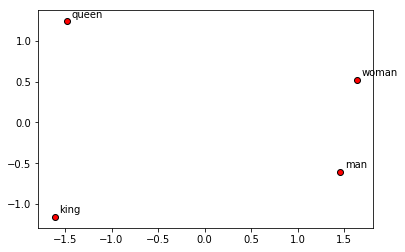

In [54]:
testwords = ['king','queen','man','woman']
display_pca_scatterplot(model,testwords)

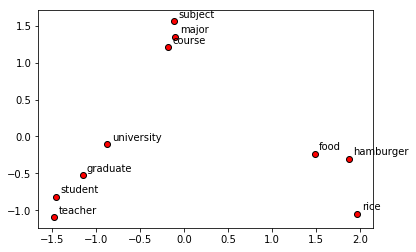

In [55]:
mywords = ['rice','university','student','course','teacher','food','hamburger','subject','major','graduate']
display_pca_scatterplot(model,mywords)